# GOES 16


In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot
import numpy as np
from datetime import datetime
from pansat.products.satellite.goes16 import l1b_radiances_all_conus

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
t_0 = datetime(2020, 8, 25, 19, 48)
t_1 = datetime(2020, 8, 25, 19, 52)
files = l1b_radiances_all_conus.download(t_0, t_1)

In [6]:
from satpy import Scene
from glob import glob
 
scn = Scene(reader='abi_l1b', filenames=files)
scn.load(['true_color'])
 
new_scn = scn.resample(scn.min_area(), resampler='native')
new_scn.save_dataset('true_color', filename='hurricane_laura'+'.png')

satpy.scene (WARNING   ) :: The following datasets were not created and may require resampling to be generated: DataID(name='true_color')
/home/simon/build/anaconda3/lib/python3.7/site-packages/satpy/node.py:105: UserWarning: Attribute access to DataIDs is deprecated, use key access instead.
  return self.name == other.name
/home/simon/build/anaconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)
/home/simon/build/anaconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/home/simon/build/anaconda3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in log
  return func(*args2)
/home/simon/build/anaconda3/lib/python3.7/site-packages/satpy/resample.py:925: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(data.reshape(new_shape), axis=(1, 3))
/home/simon/build/anaconda3/lib/python3.7/site-packages/

In [ ]:
new_scn.show

In [7]:
from PIL import Image
tc = Image.open("hurrican_laura.png")

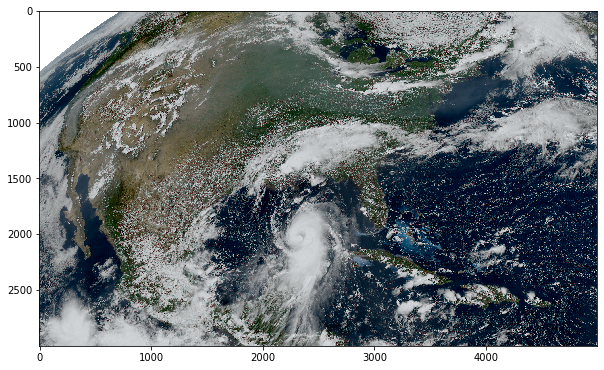

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.imshow(tc)